In [1]:
%matplotlib inline
import collections
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

data from https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#

It's time to revisit your classifier from the previous assignment. Using the evaluation techniques we've covered here, look at your classifier's performance in more detail. Then go back and iterate by engineering new features, removing poor features, or tuning parameters. Repeat this process until you have five different versions of your classifier. Once you've iterated, answer these questions to compare the performance of each:

Do any of your classifiers seem to overfit?
Which seem to perform the best? Why?
Which features seemed to be most impactful to performance?
Write up your iterations and answers to the above questions in a few pages. Submit a link below and go over it with your mentor to see if they have any other ideas on how you could improve your classifier's performance.



In [4]:
#load data 
file = open("/Users/jiahuiguo/Documents/GitHub/Thinkful/Thinkful_Practice/Bootcamp/U2_supervised_learning/Bayes/imdb_labelled.txt")
text = []
positivity = []

for line in file:
    text.append(line[:-2].strip())
    positivity.append(int(line[-2]))
    
df = pd.DataFrame()
df["text"] = text 
df["positivity"] = positivity
df.head()

,text,positivity
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


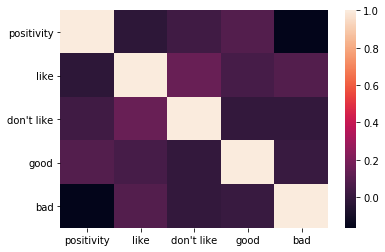

In [5]:
keyword1 = ['like',"don't like", 'good', 'bad']

for key in keyword1:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

sns.heatmap(df.corr())

In [6]:
data = df[keyword1]
target = df['positivity']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 468


In [7]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.51, 0.53, 0.52, 0.55, 0.52, 0.56, 0.54, 0.55, 0.51, 0.52])

while most groups has predictions around .52, there appears to have three groups further apart, with one at .54, one at .55, and one at .56

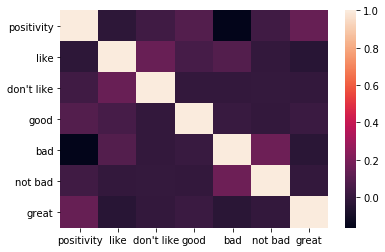

In [8]:
keyword2 = ['like',"don't like", 'good', 'bad',"not bad",
            'great']

for key in keyword2:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

sns.heatmap(df.corr())

In [10]:
data = df[keyword2]
target = df['positivity']

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

cross_val_score(bnb, data, target, cv=10)

Number of mislabeled points out of a total 1000 points : 455


array([0.56, 0.53, 0.53, 0.55, 0.56, 0.55, 0.58, 0.55, 0.53, 0.5 ])

now we have greater fluctuation from .5 to .58...

Number of mislabeled points out of a total 1000 points : 453


array([0.47, 0.52, 0.55, 0.59, 0.52, 0.5 , 0.56, 0.52, 0.63, 0.53])

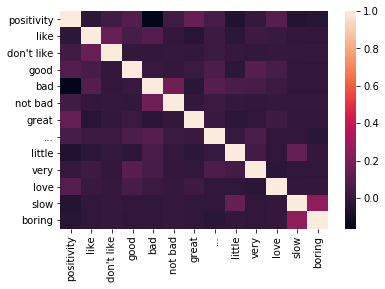

In [11]:
keyword3 = ['like','good',"...", "little", 'very', "love",  
            "slow", "boring"]

for key in keyword3:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

sns.heatmap(df.corr())

data = df[keyword3]
target = df['positivity']

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

cross_val_score(bnb, data, target, cv=10)

now we have even greater fluctuation from .47 to .63...

Number of mislabeled points out of a total 1000 points : 466


array([0.51, 0.54, 0.52, 0.55, 0.52, 0.56, 0.56, 0.55, 0.51, 0.52])

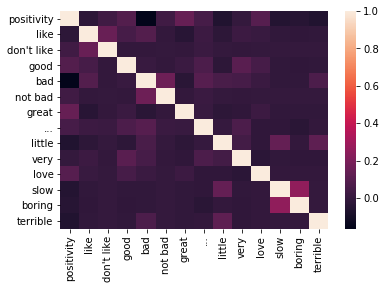

In [13]:
keyword4 = ['like','good', "bad", "terrible"]

for key in keyword4:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

sns.heatmap(df.corr())

data = df[keyword4]
target = df['positivity']

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

cross_val_score(bnb, data, target, cv=10)

similar to the keyword one, there seems to be less overfitting, but the model did also drop in terms of predictive power on the learning data. 